In [1]:
from prepare import prep_titanic_data, prep_telco_data, prep_iris_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



from pydataset import data


### Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

# ------------------------------TITANIC DATA----------------------------------

In [2]:
df = acquire.new_titanic_data()


In [3]:
train, validate, test = prep_titanic_data(df)

Train:(498, 10)
Test:(179, 10)
Val: (214, 10)
Train Titanic Data:
     survived  pclass   age  sibsp  parch      fare  alone  sex_male  \
583         0       1  36.0      0      0   40.1250      1         1   
165         1       3   9.0      0      2   20.5250      0         1   
50          0       3   7.0      4      1   39.6875      0         1   
259         1       2  50.0      0      1   26.0000      0         0   
306         1       1   NaN      0      0  110.8833      1         0   
..        ...     ...   ...    ...    ...       ...    ...       ...   
313         0       3  28.0      0      0    7.8958      1         1   
636         0       3  32.0      0      0    7.9250      1         1   
222         0       3  51.0      0      0    8.0500      1         1   
485         0       3   NaN      3      1   25.4667      0         0   
744         1       3  31.0      0      0    7.9250      1         1   

     embark_town_Queenstown  embark_town_Southampton  
583           

In [4]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [5]:
train


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,0,3,28.000000,0,0,7.8958,1,1,0,1
636,0,3,32.000000,0,0,7.9250,1,1,0,1
222,0,3,51.000000,0,0,8.0500,1,1,0,1
485,0,3,29.678105,3,1,25.4667,0,0,0,1


### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [6]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [7]:


def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [8]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [9]:


clf = clf.fit(X_train, y_train)


In [10]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(0.125, 0.375, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(0.375, 0.375, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(0.625, 0.375, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.6875, 0.125, 'gini = 0.17

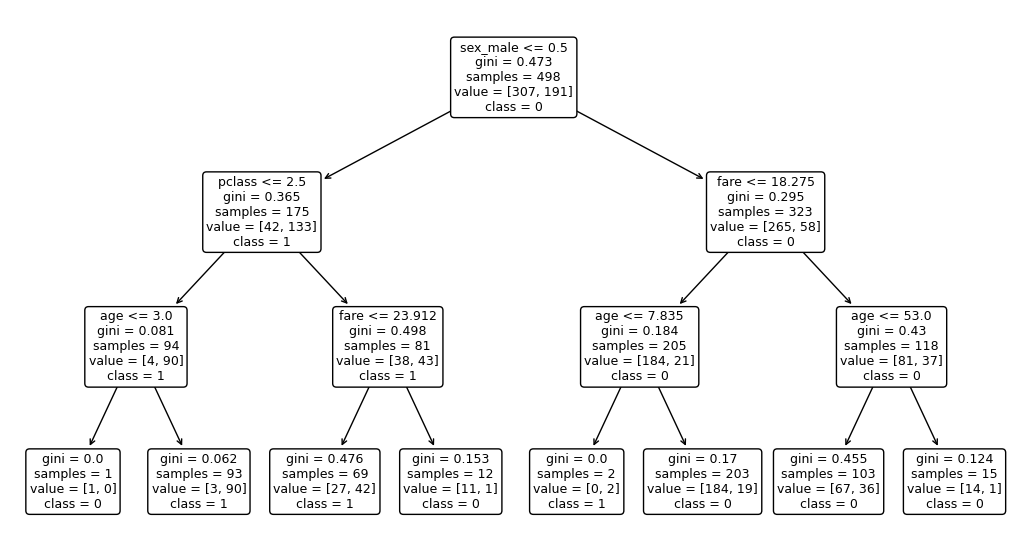

In [11]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

accuracy

In [12]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.83


make pred

In [13]:

y_pred = clf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 1, 1])

check probability

In [14]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

confusion matrix

In [15]:

confusion_matrix(y_train, y_pred)


array([[277,  30],
       [ 57, 134]])

In [16]:
labels = sorted(y_train.unique())

cm = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


In [17]:
cm

,0,1
0,277,30
1,57,134


classification report

In [18]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [19]:


tn = cm.iloc[0, 0]
fp = cm.iloc[0, 1]
fn = cm.iloc[1, 0]
tp = cm.iloc[1, 1]

accuracy = (tp + tn) / (tn + fp + fn + tp)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

support_pos = tp + fn
support_neg = fp + tn

evaluation_metrics = {
    'metric': [
        'accuracy',
        'true_positive_rate',
        'false_positive_rate',
        'true_negative_rate',
        'false_negative_rate',
        'precision',
        'recall',
        'f1_score',
        'support_pos',
        'support_neg'
    ],
    'score': [
        accuracy,
        true_positive_rate,
        false_positive_rate,
        true_negative_rate,
        false_negative_rate,
        precision,
        recall,
        f1_score,
        support_pos,
        support_neg
    ]
}

metrics_df = pd.DataFrame(evaluation_metrics)

In [20]:
metrics_df

,metric,score
0,accuracy,0.825301
1,true_positive_rate,0.701571
2,false_positive_rate,0.097720
3,true_negative_rate,0.902280
4,false_negative_rate,0.298429
5,precision,0.817073
6,recall,0.701571
7,f1_score,0.754930
8,support_pos,191.000000
9,support_neg,307.000000


### Run through steps 2-4 using a different max_depth value.

In [21]:
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

In [22]:
clf = clf.fit(X_train, y_train)

In [23]:
clf

DecisionTreeClassifier(max_depth=2, random_state=123)

[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(0.75, 0.5, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.43\nsamples = 118\nvalue = [81, 37]\nclass = 0')]

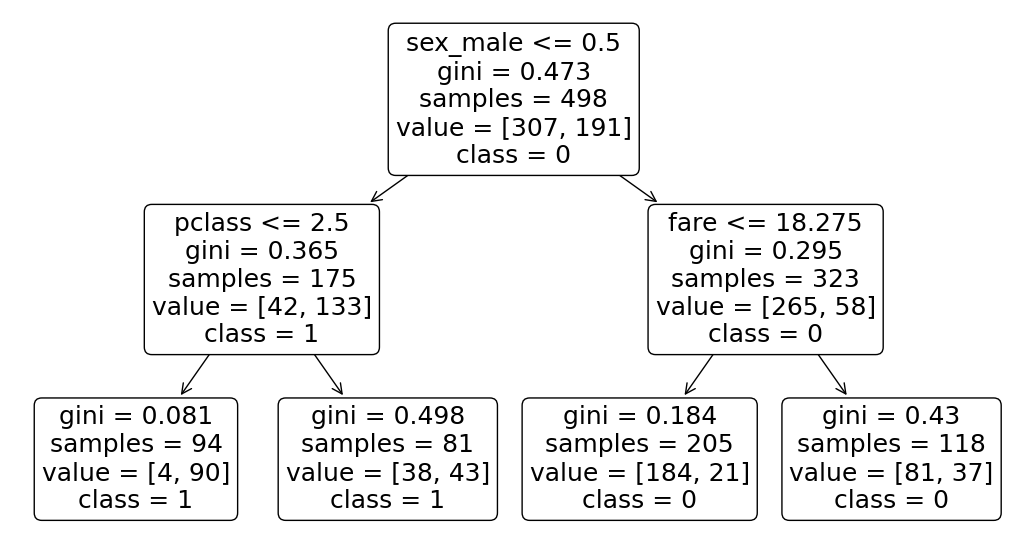

In [24]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [25]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


max depth 5

In [27]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [28]:
clf = clf.fit(X_train, y_train)

In [29]:
clf

DecisionTreeClassifier(max_depth=5, random_state=123)

In [30]:
plt.figure(figsize=(13, 7), dpi = 1500)
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()

In [31]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [32]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


### Which model performs better on your in-sample data?

model max depth 3

### Which model performs best on your out-of-sample data, the validate set?

In [33]:


model_set = []
model_accuracies = []

for i in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    train_score = round(dt.score(X_train, y_train), 2)
    validate_score = round(dt.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score
    
    model_set.append(dt)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_difference': score_difference
    })


In [34]:
df = pd.DataFrame(model_accuracies)

In [35]:
df

,max_depth,train_score,validate_score,score_difference
0,1,0.80,0.76,0.04
1,2,0.80,0.76,0.04
2,3,0.83,0.80,0.03
3,4,0.84,0.79,0.05
4,5,0.85,0.80,0.05
5,6,0.87,0.79,0.08
6,7,0.89,0.79,0.10
7,8,0.90,0.79,0.11
8,9,0.92,0.80,0.12
9,10,0.93,0.79,0.14








### Work through these same exercises using the Telco dataset.

# ------------------------------TELCO DATA----------------------------------

####  acquire and prep telco data

In [36]:
df = acquire.new_telco_data()


In [37]:
train, validate, test = prep_telco_data(df)

Train:(3937, 41)
Test:(1407, 41)
Val: (1688, 41)
Train Telco Data:
(3937, 41)
      gender  senior_citizen  partner  dependents  tenure  phone_service  \
5919       1               0        0           0      58              1   
1915       0               0        0           1      71              1   
5054       1               0        1           1      35              1   
2355       0               0        1           1       1              1   
6279       0               1        0           0      20              1   
...      ...             ...      ...         ...     ...            ...   
394        1               0        0           0      24              1   
3763       1               0        1           1      10              1   
3444       1               0        1           1      22              1   
1002       0               0        0           1      22              1   
4192       0               0        0           0       2              1   

     mult

In [38]:
train

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,1,0,0,0,58,1,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,0,0,0,1,71,1,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,1,0,1,1,35,1,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,0,0,1,1,1,1,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,0,1,0,0,20,1,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,0,0,0,24,1,Yes,No,No,Yes,...,1,0,0,0,0,1,0,1,0,0
3763,1,0,1,1,10,1,Yes,Yes,No,No,...,1,0,1,0,0,1,0,0,1,0
3444,1,0,1,1,22,1,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
1002,0,0,0,1,22,1,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [39]:
pd.set_option('display.max_columns', None)

In [40]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card 

In [41]:
X_train = train.drop(columns=['churn', \
                              'multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'])
y_train = train.churn

X_validate = validate.drop(columns=['churn', \
                              'multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'])
y_validate = validate.churn

X_test = test.drop(columns=['churn', \
                              'multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'])
y_test = test.churn

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((3937, 30), (1688, 30), (1407, 30))

#### create baseline

In [42]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

In [43]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.7343154686309372

#### fit it

In [44]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [45]:
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'tenure <= 15.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(0.25, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.498\nsamples = 1371\nvalue = [733, 638]\nclass = 0'),
 Text(0.125, 0.375, 'tenure <= 3.5\ngini = 0.416\nsamples = 804\nvalue = [567, 237]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.491\nsamples = 356\nvalue = [202, 154]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.302\nsamples = 448\nvalue = [365, 83]\nclass = 0'),
 Text(0.375, 0.375, 'total_charges <= 124.475\ngini = 0.414\nsamples = 567\nvalue = [166, 401]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.203\nsamples = 131\nvalue = [15, 116]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.453\nsamples = 436\nvalue = [151, 285]\nclass = 1'),
 Text(0.75, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.267\nsamples = 2566\nvalue = [2158, 408]\nclass = 0'),
 Text(0.625, 0.375, 'contract_type_Two year <= 0.5\ngini = 0.099\nsamples = 1411\nvalue = [1337, 74]\nclass =

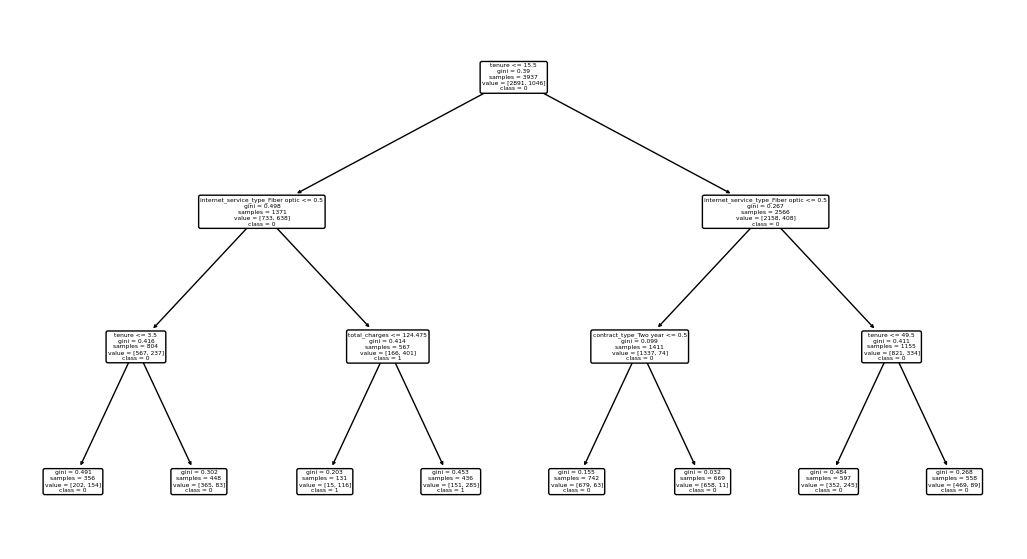

In [46]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

#### prediction

In [47]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

#### probability

In [48]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.91509434, 0.08490566],
       [0.84050179, 0.15949821],
       [0.91509434, 0.08490566],
       [0.56741573, 0.43258427],
       [0.91509434, 0.08490566]])

#### confusion matrix

In [49]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))

In [50]:
cm

,0,1
0,2725,166
1,645,401


#### Classification Report

In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.76      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [52]:
tn = cm.iloc[0, 0]
fp = cm.iloc[0, 1]
fn = cm.iloc[1, 0]
tp = cm.iloc[1, 1]

accuracy = (tp + tn) / (tn + fp + fn + tp)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

support_pos = tp + fn
support_neg = fp + tn

evaluation_metrics = {
    'metric': [
        'accuracy',
        'true_positive_rate',
        'false_positive_rate',
        'true_negative_rate',
        'false_negative_rate',
        'precision',
        'recall',
        'f1_score',
        'support_pos',
        'support_neg'
    ],
    'score': [
        accuracy,
        true_positive_rate,
        false_positive_rate,
        true_negative_rate,
        false_negative_rate,
        precision,
        recall,
        f1_score,
        support_pos,
        support_neg
    ]
}

metrics_df = pd.DataFrame(evaluation_metrics)

In [53]:
metrics_df

,metric,score
0,accuracy,0.794006
1,true_positive_rate,0.383365
2,false_positive_rate,0.057420
3,true_negative_rate,0.942580
4,false_negative_rate,0.616635
5,precision,0.707231
6,recall,0.383365
7,f1_score,0.497210
8,support_pos,1046.000000
9,support_neg,2891.000000


#### Best Model

In [54]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    train_score = round(dt.score(X_train, y_train), 2)
    validate_score = round(dt.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score
    
    model_set.append(dt)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_difference': score_difference
    })

In [55]:
best_model = pd.DataFrame(model_accuracies)

In [56]:
best_model

,max_depth,train_score,validate_score,score_difference
0,1,0.73,0.73,0.00
1,2,0.79,0.78,0.01
2,3,0.79,0.78,0.01
3,4,0.80,0.78,0.02
4,5,0.81,0.78,0.03
5,6,0.82,0.78,0.04
6,7,0.83,0.76,0.07
7,8,0.84,0.76,0.08
8,9,0.86,0.76,0.10
9,10,0.88,0.75,0.13


### Experiment with this model on other datasets with a higher number of output classes.

# ------------------------------IRIS DATA----------------------------------

acquire

In [57]:
df = acquire.new_iris_db()


In [58]:
train, test, validate = prep_iris_data(df)

Train:(84, 8)
Test:(30, 8)
Val: (36, 8)
Train Iris Data:
(84, 8)
        species  sepal_length  sepal_width  petal_length  petal_width  setosa  \
79   versicolor           5.7          2.6           3.5          1.0       0   
36       setosa           5.5          3.5           1.3          0.2       1   
133   virginica           6.3          2.8           5.1          1.5       0   
95   versicolor           5.7          3.0           4.2          1.2       0   
18       setosa           5.7          3.8           1.7          0.3       1   
139   virginica           6.9          3.1           5.4          2.1       0   
20       setosa           5.4          3.4           1.7          0.2       1   
31       setosa           5.4          3.4           1.5          0.4       1   
6        setosa           4.6          3.4           1.4          0.3       1   
115   virginica           6.4          3.2           5.3          2.3       0   
91   versicolor           6.1          3.0  

In [59]:
X_train = train.drop(columns=['species','setosa', 'virginica', 'versicolor'])
y_train = train.species

X_validate = validate.drop(columns=['species','setosa', 'virginica', 'versicolor'])
y_validate = validate.species

X_test = test.drop(columns=['species','setosa', 'virginica', 'versicolor'])
y_test = test.species

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((84, 4), (30, 4), (36, 4))

#### fit

In [60]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [61]:
clf = clf.fit(X_train, y_train)

In [62]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(0.3333333333333333, 0.875, 'petal_length <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]\nclass = setosa'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal_length <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]\nclass = versicolor'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal_length <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]\nclass = virginica'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica')]

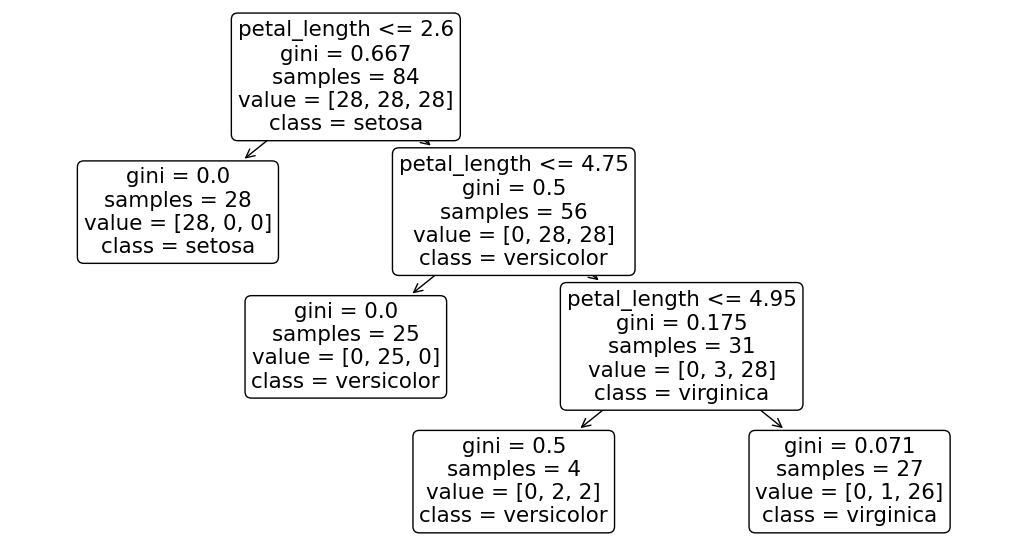

In [63]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


#### predict

In [64]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

#### Confusion Matrix

In [65]:
confusion_matrix(y_train, y_pred)


array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

#### Classification Report

In [66]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [67]:
tn = cm.iloc[0, 0]
fp = cm.iloc[0, 1]
fn = cm.iloc[1, 0]
tp = cm.iloc[1, 1]

accuracy = (tp + tn) / (tn + fp + fn + tp)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

support_pos = tp + fn
support_neg = fp + tn

evaluation_metrics = {
    'metric': [
        'accuracy',
        'true_positive_rate',
        'false_positive_rate',
        'true_negative_rate',
        'false_negative_rate',
        'precision',
        'recall',
        'f1_score',
        'support_pos',
        'support_neg'
    ],
    'score': [
        accuracy,
        true_positive_rate,
        false_positive_rate,
        true_negative_rate,
        false_negative_rate,
        precision,
        recall,
        f1_score,
        support_pos,
        support_neg
    ]
}

metrics_df = pd.DataFrame(evaluation_metrics)

In [68]:
metrics_df

,metric,score
0,accuracy,0.794006
1,true_positive_rate,0.383365
2,false_positive_rate,0.057420
3,true_negative_rate,0.942580
4,false_negative_rate,0.616635
5,precision,0.707231
6,recall,0.383365
7,f1_score,0.497210
8,support_pos,1046.000000
9,support_neg,2891.000000


#### Accuracy

In [69]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.96


In [70]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    train_score = round(dt.score(X_train, y_train), 2)
    validate_score = round(dt.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score
    
    model_set.append(dt)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_difference': score_difference
    })

##### NOTE: Due to all 3 species sharing the same mode, baseline accuracy for guessing the correct species is 33%

In [71]:
pd.DataFrame(model_accuracies)

,max_depth,train_score,validate_score,score_difference
0,1,0.67,0.67,0.00
1,2,0.96,0.90,0.06
2,3,0.96,0.90,0.06
3,4,0.99,0.83,0.16
4,5,0.99,0.83,0.16
5,6,1.00,0.83,0.17
6,7,1.00,0.83,0.17
7,8,1.00,0.83,0.17
8,9,1.00,0.83,0.17
9,10,1.00,0.83,0.17
